<a href="https://colab.research.google.com/github/JSEFERINO/ESTADISTICA-INFERENCIAL-2025/blob/main/03_Lab3_Muestreo_de_Medias_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Estadística Inferencial por Julio Hurtado Márquez**
## **Laboratorio 3- Muestreo Aleatorio de Medias- Parte 1**

## *El muestreo consiste en tomar muchas muestras $n$*

## **1. Ejemplo: Vamos a tomar $n$ muestras del curso de Estadística II - Inferencial, donde preguntemos la edad de 5 Estudiantes para muestrear la media muestral $\bar{x}$ y la varianza $S^2$ . Para este proceso usaremos Python en Colab**

# **a. Ejemplo: Simular el lanzamiento de dos dados $n = 100$ veces - Usando Python**

In [37]:
# **a. Ejemplo: Simular el lanzamiento de dos dados n veces - Usando Python**
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
n = int(input("Escriba el número de veces en que lanzara los dos dados: "))
a = 18 # Valor minimo en un dado
b = 22 # Valor máximo en un dado
x=1 # nos va indicar el primer lanzamiento
E1 = [] # Edad del Estudiante 1
E2 = [] # Edad del Estudiante 2
E3 = [] # Edad del Estudiante 3
E4 = [] # Edad del Estudiante 4
E5 = [] # Edad del Estudiante 5

suma12 = [] # Edad Total de los cinco estudiantes
media = [] # Edad Promedio de los cinco estudiantes
varianza = [] # Varianza Muestral de la Edad de los cinco estudiantes
suma = 0 # Acumular los resultados sumandolos

while x<=n: # Esto es para decir que queremos lanzar el dado 10 veces
    valor1=random.randint(a,b) # Edad Estudiante 1
    E1.append(valor1) # Almacenar Edad Estudiante 1
    valor2=random.randint(a,b) # Edad Estudiante 2
    E2.append(valor2) # Almacenar Edad Estudiante 2
    valor3=random.randint(a,b) # Edad Estudiante 3
    E3.append(valor3) # Almacenar Edad Estudiante 3
    valor4=random.randint(a,b) # Edad Estudiante 4
    E4.append(valor4) # Almacenar Edad Estudiante 4
    valor5=random.randint(a,b) # Edad Estudiante 5
    E5.append(valor5) # Almacenar Edad Estudiante 5
    suma12.append(valor1+valor2+valor3+valor4+valor5)

    # Calculate the mean for the current iteration
    current_mean = (valor1+valor2+valor3+valor4+valor5)/5
    media.append(current_mean)

    # Use the current mean for variance calculation
    varianza.append((valor1**2+valor2**2+valor3**2+valor4**2+valor5**2-5*(current_mean**2))/4)


    suma=suma+valor1+valor2+valor3+valor4+valor5 # Acumulando la suma de los valores obtenidos


    x=x+1 # el ciclo se cierra y comienza
promedio=suma/n #Deseo hallar la media de los resultados de los 10 lanzamientos

EDAD = pd.DataFrame({'E1':E1,'E2':E2,'E3':E3,'E4':E4,'E5':E5,'Total':suma12,'media':media,'varianza':varianza})



print(EDAD)

Escriba el número de veces en que lanzara los dos dados: 5000
      E1  E2  E3  E4  E5  Total  media  varianza
0     20  21  22  22  18    103   20.6       2.8
1     22  20  18  21  19    100   20.0       2.5
2     18  19  20  19  22     98   19.6       2.3
3     19  20  19  19  18     95   19.0       0.5
4     18  19  20  20  18     95   19.0       1.0
...   ..  ..  ..  ..  ..    ...    ...       ...
4995  21  21  21  20  20    103   20.6       0.3
4996  19  20  20  18  19     96   19.2       0.7
4997  19  20  19  18  18     94   18.8       0.7
4998  22  21  18  20  20    101   20.2       2.2
4999  18  20  18  20  19     95   19.0       1.0

[5000 rows x 8 columns]


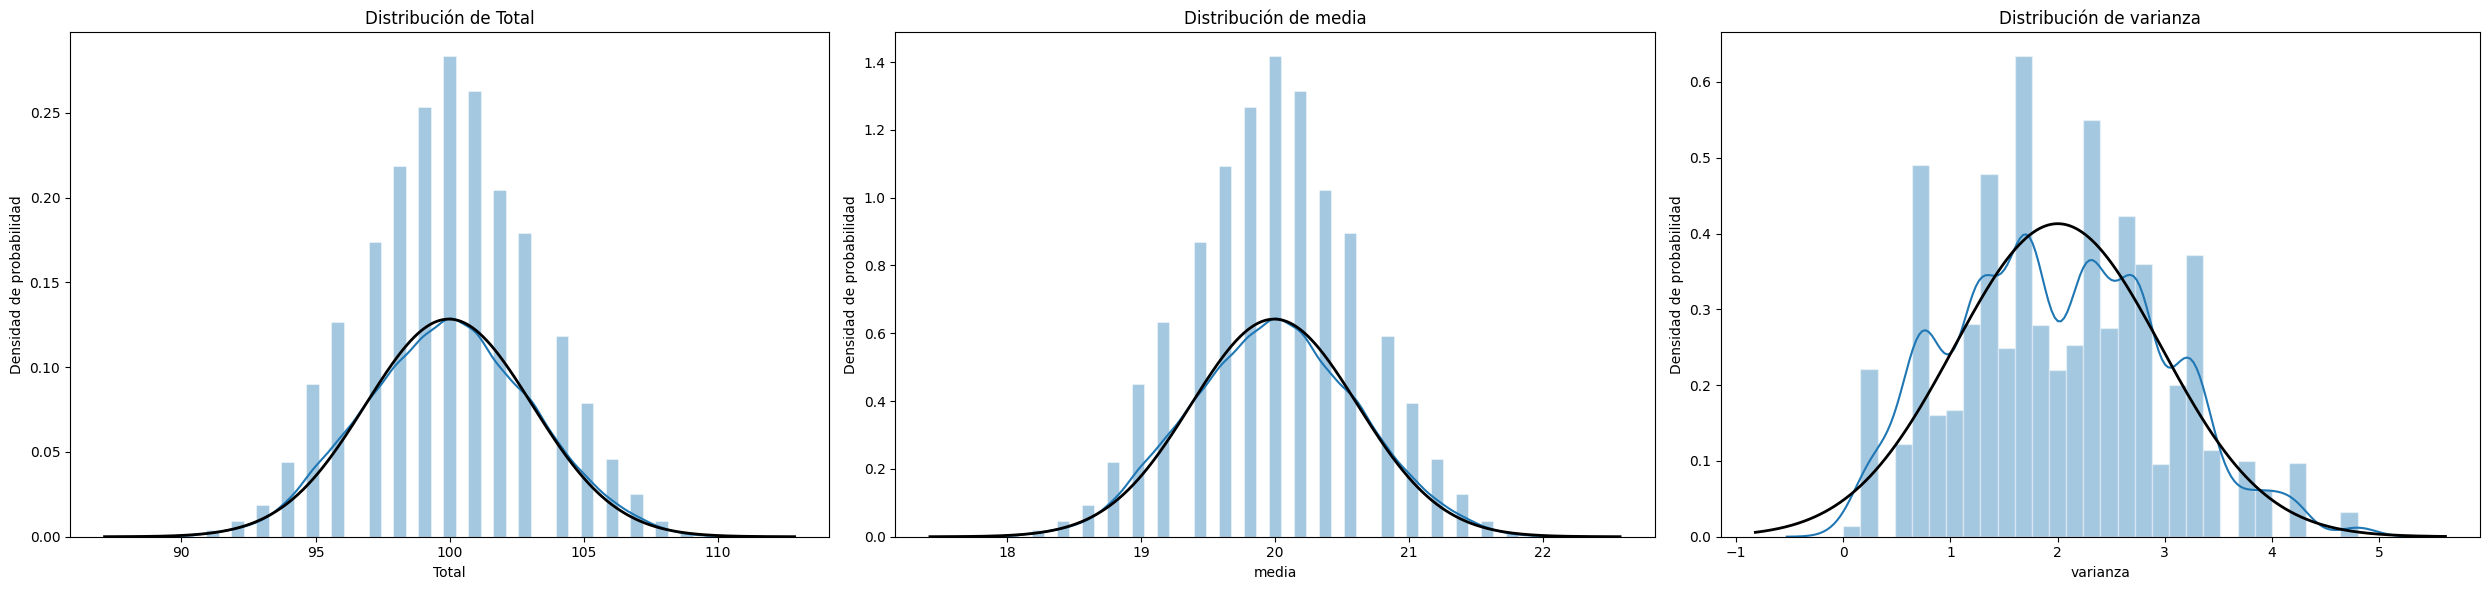

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Supongamos que 'dados' es tu DataFrame y ya tienes cargados los datos pertinentes

# Definir las columnas de interés
cols = EDAD.columns[5:]

# Número de columnas
N = len(cols)

# Crear figura y subplots
plt.figure(figsize=(25, 6))

# Para cada columna, ajustar una distribución normal y trazar la curva PDF
for i, col in enumerate(cols):
    plt.subplot(1, N, i+1)
    sns.histplot(EDAD[col], kde=True, stat="density", kde_kws=dict(cut=3),
                 alpha=.4, edgecolor=(1, 1, 1, .4))

    # Ajustar una distribución normal a los datos
    mu, std = norm.fit(EDAD[col])

    # Calcular la PDF de la distribución normal ajustada
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 10000)
    p = norm.pdf(x, mu, std)

    # Trazar la curva de densidad de probabilidad (PDF)
    plt.plot(x, p, 'k', linewidth=2)

    # Configuración del gráfico
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Densidad de probabilidad')

plt.tight_layout()
plt.show()


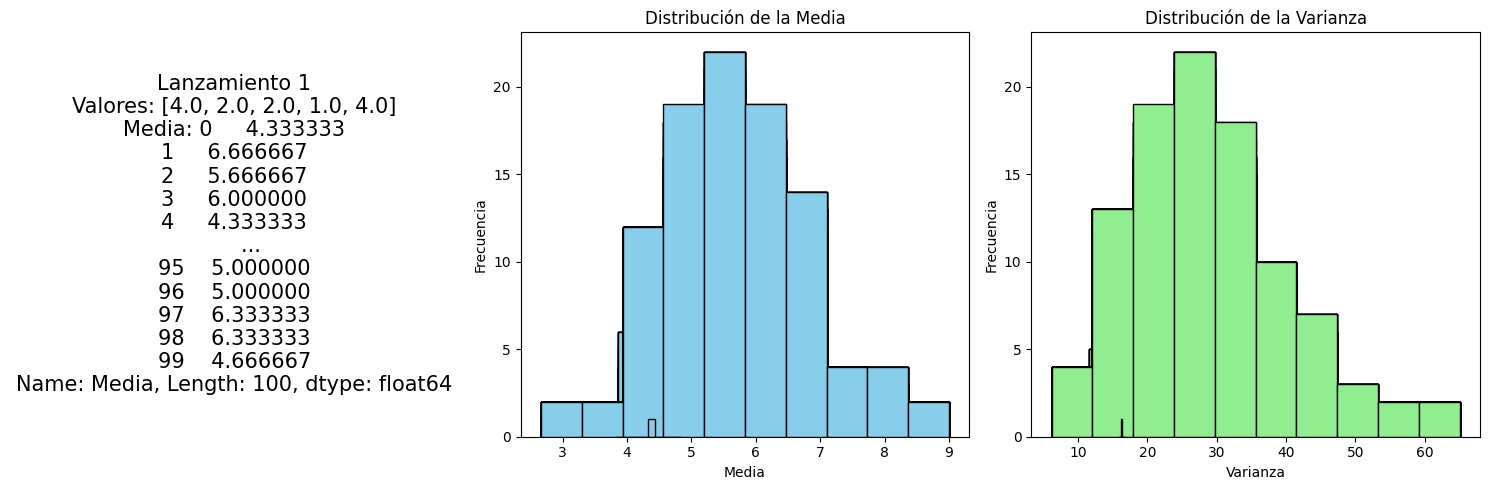

In [18]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np
import pandas as pd
import random

# Parámetros de la simulación
K = 100  # Total muestras
Tamaño_muestra = 5
a = 1  # Valor mínimo del dado
b = 6  # Valor máximo del dado

# Simulación de lanzamientos
resultados = []
for _ in range(n):
    lanzamientos = np.random.randint(a, b+1, size=Tamaño_muestra)
    resultados.append(lanzamientos)

# Convertir los resultados a un DataFrame de Pandas
df = pd.DataFrame(resultados, columns=['Dado1', 'Dado2', 'Dado3', 'Dado4', 'Dado5'])
df['Suma'] = df.sum(axis=1)
df['Media'] = df.mean(axis=1)
df['Varianza'] = df.var(axis=1)

# Create the figure and axes outside the update function
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Función para actualizar los gráficos en cada fotograma de la animación
def actualizar(i):
    axs[0].clear()
    axs[0].text(0.5, 0.5, f"Lanzamiento {i+1}\nValores: {df.iloc[i, :num_dados].tolist()}\nMedia: {df['Media']}",
               fontsize=15, ha='center', va='center', transform=axs[0].transAxes)
    axs[0].axis('off')

    axs[1].hist(df['Media'][:i+1], bins=10, color='skyblue', edgecolor='black')
    axs[1].set_title('Distribución de la Media')
    axs[1].set_xlabel('Media')
    axs[1].set_ylabel('Frecuencia')

    axs[2].hist(df['Varianza'][:i+1], bins=8, color='lightgreen', edgecolor='black')
    axs[2].set_title('Distribución de la Varianza')
    axs[2].set_xlabel('Varianza')
    axs[2].set_ylabel('Frecuencia')

    plt.tight_layout()

# Configuración de la animación
ani = animation.FuncAnimation(fig, actualizar, frames=K, interval=500, repeat=False)

# Mostrar la animación en el notebook
HTML(ani.to_html5_video())